# Section 6. Asymptotics of multidigraph families

## Section 6.1. Asymptotics of directed acyclic graphs

For historical reasons, there is a slight difference between the proof given in the paper and the assertions tested in the current notebook.

In [1]:
import sys
import sympy as sp

print("Python version", sys.version)
print("Sympy version", sp.__version__)

from datetime import date

print("Today:", date.today())

Python version 3.9.10 (main, Jan 15 2022, 11:48:00) 
[Clang 13.0.0 (clang-1300.0.29.3)]
Sympy version 1.10.1
Today: 2022-04-04


In [2]:
#### the following two lines are needed if modifications are made into the libraries
#### on-the-fly.
#
# %load_ext autoreload
# %autoreload 2
#

# Specify the local path for the modules
import os.path as osp
sys.path.append(osp.join(osp.abspath(''), '..', 'lib'))

import sympy as sp
QQ = sp.Rational

In [3]:
from sp_utils import Ai, Aiprime, aj, ajprime

## Theorem 6.1

$$
\boxed{
    \mathbb P(n,p) \sim
    \begin{cases}
        1 - \lambda, & \lambda \in [0,1);\\
        \gamma_1 n^{-1/3}, & \lambda = 1;\\
        \gamma_2(\lambda) n^{-1/3} \exp \left(
            -\alpha(\lambda) n
            + a_1 \beta(\lambda) n^{1/3}
        \right), & \lambda > 1,
    \end{cases}
}
$$
where the parameters $\gamma_1$, $\gamma_2(\lambda)$, $\alpha(\lambda)$, $\beta(\lambda)$ are given in the paper, and
$a_1$ is the dominant zero of the Airy function.

**ASSERTION 6.4.1**
First of all, we check that the integration trajectory does not cross the slit constituting the branch cut of the function $T(zw)$:
$$
\boxed{
    \lambda e^{-\lambda} < e^{-1}
}
$$

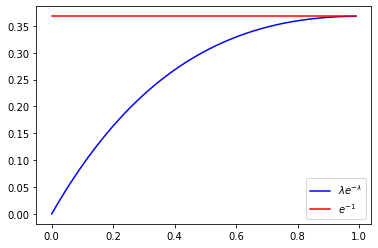

In [4]:
import matplotlib.pyplot as plt
import numpy as np

args = np.linspace(0, 0.99, 200)
lhs = [lam * np.exp(-lam) for lam in args]
rhs = [np.exp(-1) for lam in args]

plt.plot(args, lhs, c='b', label=r'$\lambda e^{-\lambda}$')
plt.plot(args, rhs, c='r', label=r'$e^{-1}$')
plt.legend()
plt.show();

The assertion can be checked numerically, but also follows from the fact that the only stationary point of $\lambda e^{-\lambda}$ is $\lambda=1$.

In [5]:
lam = sp.Symbol('lambda')

In [6]:
# We expect an only solution {lam = 1}

st_points = sp.solve(sp.diff(lam * sp.exp(-lam), lam), lam)

In [7]:
assert len(st_points) == 1
assert st_points[0] == 1

# For the segment, we can also double-check numerically
for l in args:
    assert l * np.exp(-l) < np.exp(-1)
    
print("Assertion 6.4.1 tested successfully.")

Assertion 6.4.1 tested successfully.


The most interesting application of the computer algebra happens in the supercritical case $\lambda > 1$. Let us assume that we accept the result of the application of the residue theorem.

Then, we should also accept that according to the transfer lemma, the contribution of the error term
is
$$
    \dfrac{1}{2 \pi i} \oint_{|z|=\rho}
    \dfrac{1}{\phi(z, w) z^{n+1}} dz =
    \mathcal O\left(
        \dfrac{w^{2/3}}{|\phi(\rho,w)|\rho^n}
    \right)
$$
which we will show to be negligible below.

**ASSERTION 6.4.2**
$$
\boxed{ -
    \dfrac{n! e^{-wn^2/2}}
    {\varrho_1(w)^{n+1} \partial_z
    \phi(\varrho_1(w),w)}
    \sim
    \gamma_2(\lambda) n^{-1/3}
    \exp(E(\lambda, n))
}
$$
where
$$
\boxed{
    E(\lambda, n) =
    { -\alpha(\lambda)n + 2^{1/3} a_1 \lambda^{-1/3}     }
    (\lambda-1) n^{1/3}
    { =                                                  }
    { -\alpha(\lambda)n + a_1 \beta(\lambda) n^{1/3}     }
}
$$

Let us recover the expressions for $\varrho_1(w)$ and $\partial_z \phi(\varrho_1(w),w)$ from Theorem 4.11.

In [8]:
## We inherit the symbolic dominant root of the Airy function from
## j-th symbolic root. This will actually modify the name of the
## j-th symbolic root inside the library `sp_utils`, but we are not
## bothered by that because
##     (i) we are only using j=1 inside this notebook;
##     (ii) this modification holds only locally for the
##          current notebook,
## so this is necessary only for typing and displaying convenience
## of the formulas.

a1 = aj
a1.name = 'a_1'

assert(Ai(a1) == 0)
print("Tested: a_1 is a root of the Airy function")

Tested: a_1 is a root of the Airy function


In [9]:
w = sp.Symbol('w')

Recall the asymptotic expression for the root of $\phi(z, w)$ from Theorem 4.11:

$$
    \varrho_1(w) = \dfrac{1}{ew} \left(
        1
        {- \dfrac{a_1}{2^{1/3}} w^{2/3}}
        {- \dfrac{1}{6} w}
    \right)
$$

In [10]:
def rho_1(w):
    return 1 / (sp.E * w) * (
        1
        - a1 / 2**QQ(1,3) * w**QQ(2,3)
        - w * QQ(1,6)
    )

In [11]:
kappa_1 = (
    sp.sqrt(2 * sp.pi)
    * 2**QQ(2,3)
    * sp.exp(QQ(7,6))
    * Aiprime(a1)
)

def partial_phi_0(w):
    return - kappa_1 * w**QQ(1,6) * sp.exp(
        -1/(2*w)
        + 2**QQ(-1,3) * a1 / w**QQ(1,3)
    )

In [12]:
def gamma_2(lam):
    return (
        2**QQ(-2,3)
        / Aiprime(a1)
        * lam**QQ(5,6)
        * sp.exp( (lam-1)/6)
    )

In [13]:
def alpha(lam):
    return (lam**2 - 1) / (2 * lam) - sp.log(lam)

In [14]:
def beta(lam):
    return 2**QQ(-1,3) * lam**QQ(-1,3) * (lam - 1)

In [15]:
def stirling_fact(n):
    return (
        sp.sqrt(2 * sp.pi * n)
        * (n/sp.E)**n
    )

In [16]:
n = sp.Symbol('n', positive=True)

In [17]:
p = lam / n

In [18]:
lhs = -(
    stirling_fact(n)
    * sp.exp(-p * n**2/2)
    / rho_1(p)**(n+1)
    / partial_phi_0(p)
)

In [19]:
rhs_1 = (
    gamma_2(lam)
    * n**QQ(-1,3)
    * sp.exp(
        -alpha(lam) * n
        +2**QQ(-1,3) * a1 * lam**QQ(-1,3) * (lam-1) * n**QQ(1,3)
    )
)

In order to check that $\mathsf{LHS} \sim \mathsf{RHS}$, for each side we write the base expression and the exponent expression, and the we check that both expressions are the products of the respective base and exponential part, and that the asymptotic equivalence holds for each of the parts.

A visual comparison of the difference of $\log$s of the left- and right-hand sides yields

In [20]:
(
    sp.series(
        sp.expand_log(sp.log(lhs), force=True).simplify(),
        n, sp.oo, n=1
    ) - sp.series(
        sp.expand_log(sp.log(rhs_1), force=True).simplify(),
        n, sp.oo, n=1
    )
).collect(n)

(2**(2/3)*a_1*lambda**(5/3)/12 + 2**(2/3)*a_1*lambda**(2/3)/2)/n**(2/3) + 2**(1/3)*a_1**2*lambda**(4/3)/(4*n**(1/3)) + O(1/n, (n, oo))

so we can see that this difference tends to zero.
Now we can also test this property in a formal way, once we know the speed of convergence.

$$
\mathsf{Test:} \quad
\log(\mathsf{RHS}) - \log(\mathsf{LHS}) \in \mathcal O(n^{-1/3}) \text{ as } n \to \infty
$$

In [21]:
assert (
    sp.series(
        sp.expand_log(sp.log(lhs), force=True).simplify(),
        n, sp.oo, n=1
    ) - sp.series(
        sp.expand_log(sp.log(rhs_1), force=True).simplify(),
        n, sp.oo, n=1
    )
).collect(n) in sp.O(n**QQ(-1,3), (n, sp.oo))

The form presented here is from the middle of the proof, but we can compare directly with the initial expression from the theorem involving $\beta(\lambda)$:

In [22]:
rhs_2 = (
    gamma_2(lam)
    * n**QQ(-1,3)
    * sp.exp(
        - alpha(lam) * n
        + a1 * beta(lam) * n**QQ(1,3)
    )
)

In [23]:
assert (
    sp.series(
        sp.expand_log(sp.log(lhs), force=True).simplify(),
        n, sp.oo, n=1
    ) - sp.series(
        sp.expand_log(sp.log(rhs_2), force=True).simplify(),
        n, sp.oo, n=1
    )
).collect(n) in sp.O(n**QQ(-1,3), (n, sp.oo))
print("Assertion 6.4.2 tested successfully.")

Assertion 6.4.2 tested successfully.


**ASSERTION 6.4.3**
$$
\boxed{
    \dfrac{n! e^{-wn^2/2} w^{2/3}}
    {|\phi(\rho,w)| \rho^n} =
    \mathcal O \left(
    n^{-1/3} \exp \left(
        { -\alpha(\lambda)n      }
        { + \theta \lambda^{-1/3} (\lambda-1) n^{1/3}   }
    \right)
    \right)
}
$$

In [24]:
theta = sp.Symbol('theta')
rho = lambda w: (1 - theta * w**QQ(2,3)) / (sp.E * w)

lhs = (
    stirling_fact(n)
    * sp.exp(-p * n**2/2)
    * p**QQ(2,3)
    / rho(p)**n
    # and finally, for phi(rho, w)
    / sp.exp(-1/(2*p) + theta * p**QQ(-1,3))
    / p**QQ(-1,6)
)

In [25]:
sp.series(
    sp.expand_log(sp.log(lhs), force=True),
    n, sp.oo, n=1
)

log(pi)/2 + log(2)/2 + log(1/n)/3 + 5*log(lambda)/6 + n*(-lambda/2 + log(lambda) + 1/(2*lambda)) + n**(1/3)*(lambda**(2/3)*theta - theta/lambda**(1/3)) + lambda**(4/3)*theta**2/(2*n**(1/3)) + O(1/n, (n, oo))

In [26]:
rhs = n**QQ(-1,3) * sp.exp(
    -alpha(lam) * n
    + theta * lam**QQ(-1,3) * (lam-1) * n**QQ(1,3)
)

In [27]:
sp.expand_log(sp.log(rhs), force=True).expand().collect(n)

n**(1/3)*(lambda**(2/3)*theta - theta/lambda**(1/3)) + n*(-lambda/2 + log(lambda) + 1/(2*lambda)) - log(n)/3

Except for the constant terms and lower order terms, these two expressions coincide.

$$
\mathsf{Test:} \quad
\log(\mathsf{RHS}) - \log(\mathsf{LHS}) \in \mathcal O(1) \text{ as } n \to \infty
$$

In [28]:
assert sp.series(
    sp.expand_log(sp.log(rhs), force=True)
    -
    sp.expand_log(sp.log(lhs), force=True)
    ,
    n, sp.oo, n=1
).expand() in sp.O(1, (n, sp.oo))
print("Assertion 6.4.3 tested successfully.")

Assertion 6.4.3 tested successfully.


## Theorem 6.3 (limits)

Let $p = (1 + \mu n^{1/3})/n$, and $|\mu| \to \infty$ so that, still, $|\mu| n^{1/3} \to 0$.
Then, the probability that a random multidigraph is acyclic is
$$
\boxed{
    \mathbb P(n,p) \sim
    \begin{cases}
        |\mu| n^{-1/3}, & \mu \to -\infty,\\
        \dfrac{2^{-2/3}}{\mathrm{Ai}'(a_1)}
        n^{-1/3} \exp \left(
            { - \dfrac{\mu^3}{6}   }
            { + 2^{1/3} a_1 \mu    }
        \right), & \mu \to +\infty.
    \end{cases}
}
$$

For the first expression, we just simplify $1 - \lambda$.

In [29]:
mu = sp.Symbol('mu')
(1 - lam).subs(lam, 1 + mu * n**QQ(-1,3))

-mu/n**(1/3)

And then comes the second expression:

In [30]:
proba = gamma_2(lam) * n**QQ(-1,3) * sp.exp(
    -alpha(lam) * n + a1 * beta(lam) * n**QQ(1,3)
)

The dominant term of the series expansion for the logarithm:

In [31]:
sp.series(
    sp.expand_log(
        sp.log(proba.subs(lam, 1 + mu * n**QQ(-1,3))),
        force=True
    ),
    n, sp.oo, n=QQ(1,3)
)

-2*log(2)/3 - log(Aiprime(a_1)) + log(1/n)/3 - mu**3/6 + 2**(2/3)*a_1*mu/2 + O(n**(-1/3), (n, oo))

In [32]:
expected_proba = (
    2**QQ(-2,3)
    / Aiprime(a1)
    * n**QQ(-1,3)
    * sp.exp(
        -mu**3/6 + 2**QQ(-1,3) * a1 * mu
    )
)

$$
\mathsf{Test:} \quad
\log(\mathsf{\mathbb P}|_{\lambda = 1 + \mu n^{-1/3}}) - \log(\mathsf{P_{expected}}) \in \mathcal O(n^{-1/3}) \text{ as } n \to \infty
$$

In [33]:
assert sp.series(
    sp.expand_log(
        sp.log(proba.subs(lam, 1 + mu * n**QQ(-1,3)))
        -
        sp.log(expected_proba)
        ,
        force=True
    ),
    n, sp.oo, n=QQ(1,3)
) in sp.O(n**QQ(-1,3), (n, sp.oo))
print("Theorem 6.3 tested successfully.")

Theorem 6.3 tested successfully.


Theorem 5.6 and Remark 5.7 can be obtained by simple arithmetics.

We postpone the plotting of the functions $\alpha(\lambda), \beta(\lambda)$ and $\gamma_2(\lambda)$ until Section 7, where, in addition, other numerical values are computed.

Thank you for reading! We are approaching simple graphs soon, which involve some technically more interesting computations, and it will be a lot of fun.